In [195]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [196]:
df = pd.read_csv('Data/colon-dataset-processed.csv')
df

,Class,Age,p16540_C/C,p16540_G/C,p16540_G/G,p16580_C/C,p16580_C/T,p16580_T/T,mdm2_G/G,mdm2_G/T,mdm2_T/T,GAL3_A/A,GAL3_C/A,GAL3_C/C,TIM1_C/C,TIM1_G/C,TIM1_G/G
0,healthy,49,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False
1,healthy,49,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
2,healthy,49,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False
3,healthy,36,False,True,False,True,False,False,False,False,True,False,True,False,True,False,False
4,healthy,49,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,diagnosed,81,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True
111,diagnosed,73,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True
112,diagnosed,56,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False
113,diagnosed,74,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True


In [197]:
df.isnull().sum()

Class         0
Age           0
p16540_C/C    0
p16540_G/C    0
p16540_G/G    0
p16580_C/C    0
p16580_C/T    0
p16580_T/T    0
mdm2_G/G      0
mdm2_G/T      0
mdm2_T/T      0
GAL3_A/A      0
GAL3_C/A      0
GAL3_C/C      0
TIM1_C/C      0
TIM1_G/C      0
TIM1_G/G      0
dtype: int64

In [198]:
data=df.drop(['Class'],axis=1)
target=df['Class']

In [199]:
target.value_counts()

diagnosed    65
healthy      50
Name: Class, dtype: int64

In [200]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3)

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

clf = LogisticRegression()
clf.fit(X_train_res, y_train_res)
clf.score(X_test, y_test)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8857142857142857

In [201]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   diagnosed       0.91      0.91      0.91        22
     healthy       0.85      0.85      0.85        13

    accuracy                           0.89        35
   macro avg       0.88      0.88      0.88        35
weighted avg       0.89      0.89      0.89        35



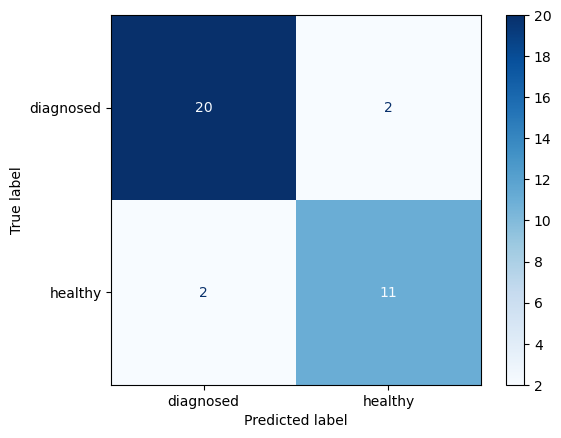

In [202]:
# Plot the confusion matrix
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [203]:
from sklearn.model_selection import GridSearchCV
best_clf = GridSearchCV(LogisticRegression(), {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}, cv=5, return_train_score=False)
best_clf.fit(X_train_res, y_train_res)
# pd.DataFrame(best_clf.cv_results_)[['param_C','param_penalty','param_solver','mean_test_score']]

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']})

In [204]:
best_params = best_clf.best_params_
best_score = best_clf.best_score_
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")


Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Cross-Validation Score: 0.85


In [205]:
best_lr_model = LogisticRegression(**best_params)
best_lr_model.fit(X_train_res, y_train_res)
test_accuracy = best_lr_model.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.2f}")


Test Set Accuracy: 0.89


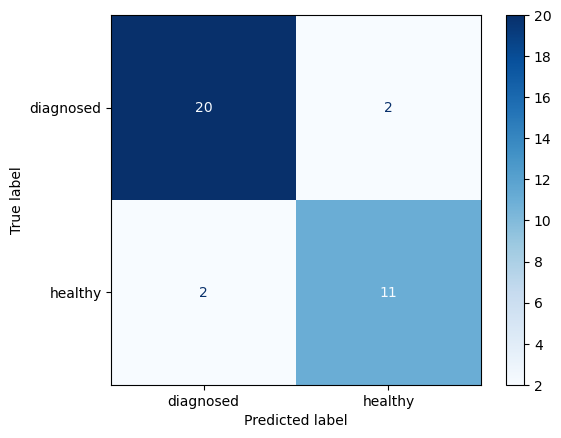

In [206]:
y_pred1= best_lr_model.predict(X_test)
cm=confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()